# Advanced plotting

In [2]:
! pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 43.4 MB/s eta 0:00:00


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# reading in the data file located in my Google drive
# informing about the missing values (M) which will be replaced with NaN
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Boston_Mon_Temp.csv'
                ,index_col=0,na_values='M')
df.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
YEAR,,,,,,,,,,,,,
1872,NaN,NaN,26.5,46.6,59.3,68.9,75.7,73.0,64.4,51.9,40.6,23.1,53.0
1873,25.1,26.4,33.9,44.9,56.5,67.3,72.9,69.8,62.8,53.5,33.3,32.1,48.2
1874,30.5,27.0,34.4,38.8,55.5,66.1,72.9,68.1,64.4,53.2,41.6,31.3,48.6
1875,20.1,22.3,31.3,42.5,57.9,66.7,72.1,71.0,59.6,50.1,34.9,29.6,46.5
1876,30.7,27.5,33.5,43.9,54.6,68.9,74.0,70.3,59.9,48.3,41.4,22.2,47.9


In [13]:
# reading in the surface air temperature data from NCEP reanalysis
ds=xr.open_dataset('/content/drive/MyDrive/Colab Notebooks/air.mon.mean.nc')
ds

<xarray.Dataset> Size: 39MB
Dimensions:  (lat: 73, lon: 144, time: 925)
Coordinates:
  * lat      (lat) float32 292B 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 576B 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 7kB 1948-01-01 1948-02-01 ... 2025-01-01
Data variables:
    air      (time, lat, lon) float32 39MB ...
Attributes:
    description:    Data from NCEP initialized reanalysis (4x/day).  These ar...
    platform:       Model
    Conventions:    COARDS
    NCO:            20121012
    history:        Thu May  4 20:11:16 2000: ncrcat -d time,0,623 /Datasets/...
    title:          monthly mean air.sig995 from the NCEP Reanalysis
    dataset_title:  NCEP-NCAR Reanalysis 1
    References:     http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis...

In [19]:
# Boston's longitude / latitude is approximately
lon = -71.05 + 360
lat = 42.35

In [58]:
# write a function to convert degF to degC
def f2c(temp):
  return (temp-32)*5/9

In [62]:
# interpolate the NCEP surface temp data in Boston for April
BOS_ncep=ds.air[3::12,:,:].interp(lat=lat,lon=lon,method='linear').to_numpy()
time_ncep=np.arange(1948,2025,1)

In [63]:
# get July temperature from the weather station, convert to degree C
BOS_nws=df['APR'].to_numpy()
time_nws=df.index.to_numpy()
BOS_nws = f2c(BOS_nws)

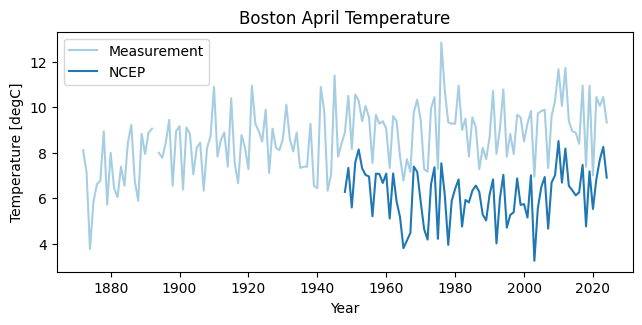

In [73]:
# Create a figure with a specific size
fig = plt.figure(figsize=(7.2, 3))

# Add an axis to the figure with specified position [left, bottom, width, height]
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# Get a colormap for consistent color selection
cmap = plt.get_cmap('Paired')

# Plot measurement data with a specific color from the colormap
ax.plot(time_nws, BOS_nws, color=cmap(0), label='Measurement')

# Plot NCEP data with a different color
ax.plot(time_ncep, BOS_ncep, color=cmap(1), label='NCEP')

# Set labels for x and y axes
ax.set_xlabel('Year')
ax.set_ylabel('Temperature [degC]')

# Set the title of the plot
ax.set_title('Boston April Temperature')

# Add a legend to differentiate the data sources
ax.legend()

# save the plot as a PDF file
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Boston_April_Temp.pdf',bbox_inches='tight')

# Display the plot
plt.show()

## Multi-panel plots

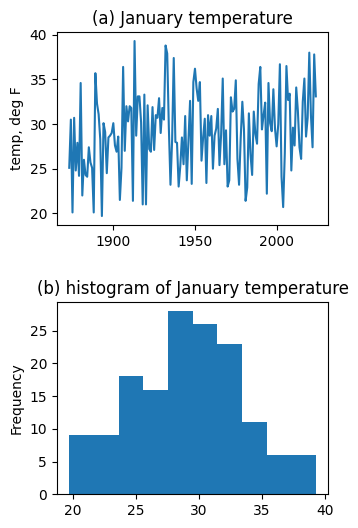

In [77]:
# Creating a figure object with a specific size
fig = plt.figure(figsize=(3.5, 6))

# Creating subplots with 3 rows and 1 column
ax = fig.subplots(2, 1)
# adjust the space in between
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.4)

# Plotting data from 'JAN' column of DataFrame df on the first subplot
ax[0].plot(df['JAN'])
ax[0].set_ylabel('temp, deg F')
ax[0].set_title('(a) January temperature')

# Creating a histogram of data from 'JAN' column of DataFrame df on the second subplot
ax[1].hist(df['JAN'])
ax[1].set_title('(b) histogram of January temperature')
ax[1].set_ylabel('Frequency')

# Displaying the plot
plt.show()

## Colormaps and projections

In [78]:
meanair0 = ds.air.mean('time').to_numpy()
x0=ds.lon.to_numpy()
y0=ds.lat.to_numpy()

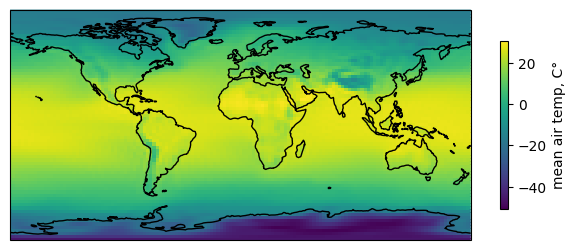

In [88]:
fig = plt.figure(figsize=(7.2, 3))

ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],projection=ccrs.PlateCarree())

im=ax.pcolormesh(x0,y0,meanair0,cmap='viridis',transform=ccrs.PlateCarree())

ax.coastlines()

plt.colorbar(im,ax=ax,shrink=0.7,label='mean air temp, C°')

plt.show()